In [1]:
import pandas
import numpy as np
from pandas import read_csv

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
data = read_csv(url, names = names)
print(data.shape)

(768, 9)


In [3]:
veri = data.values
X = veri[:, 0:8]
Y = veri[:, 8]

In [4]:
print(X.shape)

(768, 8)


In [5]:
print(Y.shape)

(768,)


In [6]:
X1 = data.iloc[:, 0:8]
Y1 = data.iloc[:, -1]

In [7]:
print(X1.shape)

(768, 8)


In [8]:
print(Y1.shape)

(768,)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

In [10]:
from numpy import set_printoptions

sc = StandardScaler()
sc.fit(X)
rescaledX = sc.transform(X)
set_printoptions(precision = 3)
print(rescaledX[0:5, :])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [11]:
sc = MinMaxScaler()
sc.fit(X)
rescaledX = sc.transform(X)
set_printoptions(precision = 3)
print(rescaledX[0:5, :])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [12]:
sc = Binarizer(threshold = 0.0)
sc.fit(X)
rescaledX = sc.transform(X)
set_printoptions(precision = 3)
print(rescaledX[0:5, :])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [13]:
"""ÖZNİTELİK SEÇİMİ""" 

In [14]:
#İSTATİSTİKSEL SEÇİM

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# chi2 ye göre okuma yap ve (k = en iyi değerler) kullanıcının belirlediği en iyi 4 değişkeni seç
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X, Y)

set_printoptions(precision = 3)
print(fit.scores_, "\n", names[0:8])
#eğitim verisini kullanacak ise _ ile yazılır, test verisini kullanacak ise _ yazılmaz.
print("\n")
features = fit.transform(X)
print(features[0:5, :])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304] 
 ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [16]:
#Değişken, Öznitelik seçim döngüsü

In [27]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= "lbfgs", max_iter = 3000)
rfe = RFE(model, 3) #RFE fonksiyonunu seçilen makine öğrenmesi yöntemi ile çalıştır, kullanıcının belirlediği en iyi 3 değişkeni kullan(sonuca göre sayı değiştirilebilir)
fit = rfe.fit(X, Y)
print("Öznitelik sayısı: %d" % fit.n_features_)
print("Seçilen öznitelikler: %s" % fit.support_)
print(names[0:8])
print("Öznitelik Sıralaması: %s" % fit.ranking_)

Öznitelik sayısı: 3
Seçilen öznitelikler: [ True False False False False  True  True False]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
Öznitelik Sıralaması: [1 2 4 6 5 1 1 3]


In [28]:
# ÖZNİTELİK ÖNEM DERECELERİ (Genellikle ağaç tabanlı yöntemler kullanılır)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)#Sona koyulan _ eğitim verisinin kullanılacağını belirtir.
print(names[0:8])

[0.109 0.225 0.089 0.073 0.083 0.152 0.122 0.147]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


C:\Users\batuh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.109 0.225 0.089 0.073 0.083 0.152 0.122 0.147]


<BarContainer object of 8 artists>

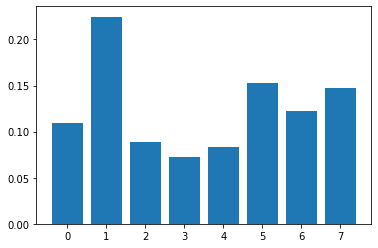

In [31]:
import matplotlib.pyplot as plt
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)

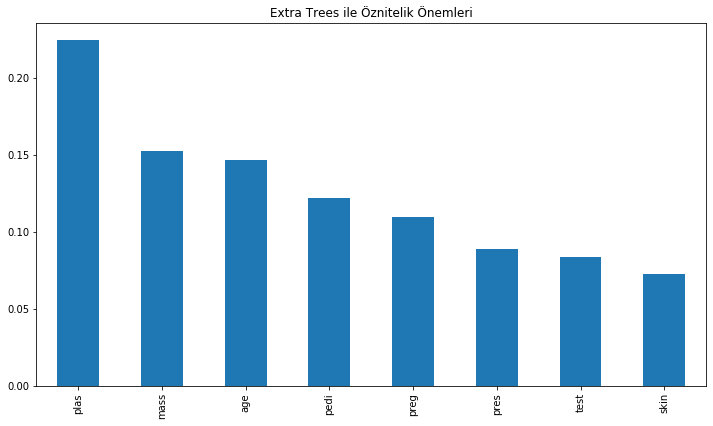

In [34]:
imp_feat = pandas.Series(model.feature_importances_, index=names[0:8]).sort_values(ascending = False)
imp_feat.plot(kind = "bar", title = "Extra Trees ile Öznitelik Önemleri", figsize = (12,8))
plt.ylabel = ("Öznitelik Önem Derecesi")
plt.subplots_adjust(bottom = 0.25)
plt.show()